In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
#feature extraction

data = [
    {'age':4 , 'height':96.0},
    {'age':2 , 'height':81.6},
    {'age':3 , 'height':88.6},
    {'age':1 , 'height':73.9},
       
       ]

In [3]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False) #instantiate
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 2. , 81.6],
       [ 3. , 88.6],
       [ 1. , 73.9]])

In [4]:
data_transformed.shape

(4, 2)

In [6]:
#data imputation for missing values
from sklearn.impute import SimpleImputer

In [14]:
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None,names=cols)

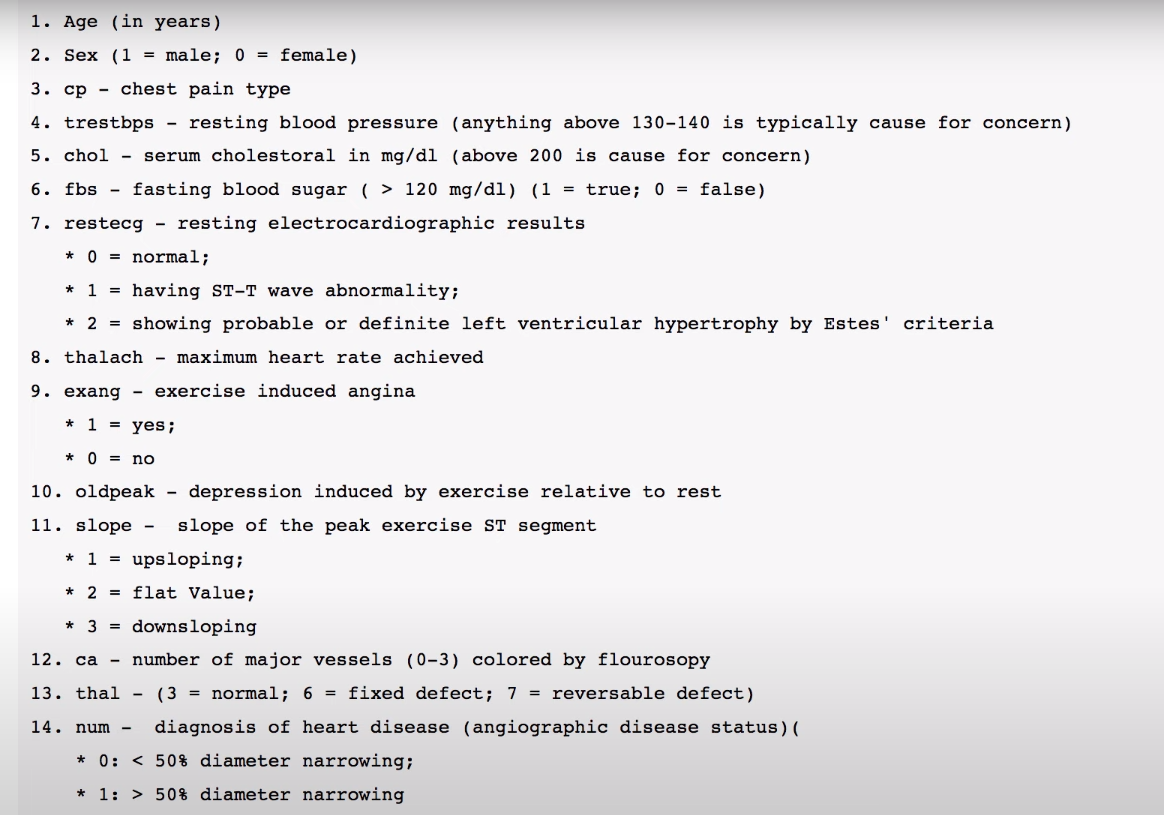

In [15]:
#sanity check
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [16]:
#chech for numerical columns
(heart_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [20]:
# for non-numerical
heart_data.ca.unique()
#and take a count of them
heart_data.loc[heart_data.ca == '?','ca'].count()

4

In [21]:
heart_data.thal.unique()
heart_data.loc[heart_data.thal == '?','thal'].count()

2

In [24]:
# replace with NaN and use simpleImputer
heart_data.replace('?',np.nan,inplace=True)

imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 14)


In [26]:
# for see the missing values so add 2 additional columns by default add_indicator is False

imputer = SimpleImputer(missing_values=np.nan,strategy='mean',add_indicator=True)
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 16)


In [27]:
# feature Scaling

In [28]:
cols = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight', 'Viscera weight','Shell weight','Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None,names=cols)

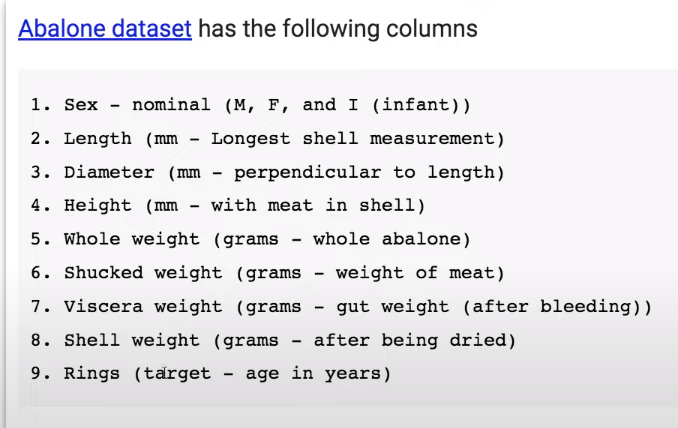

In [31]:
#examine
abalone_data.info() # bcz feature scaling can be applied only to numerical attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [32]:
# to convert Sex to numeric
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [33]:
abalone_data = abalone_data.replace({'Sex':{'M':1,'F':2,'I':3}})
abalone_data.info()# all are numerical now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


/tmp/ipykernel_30121/352311620.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  abalone_data = abalone_data.replace({'Sex':{'M':1,'F':2,'I':3}})


In [35]:
abalone_data.describe().T # to see stat

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


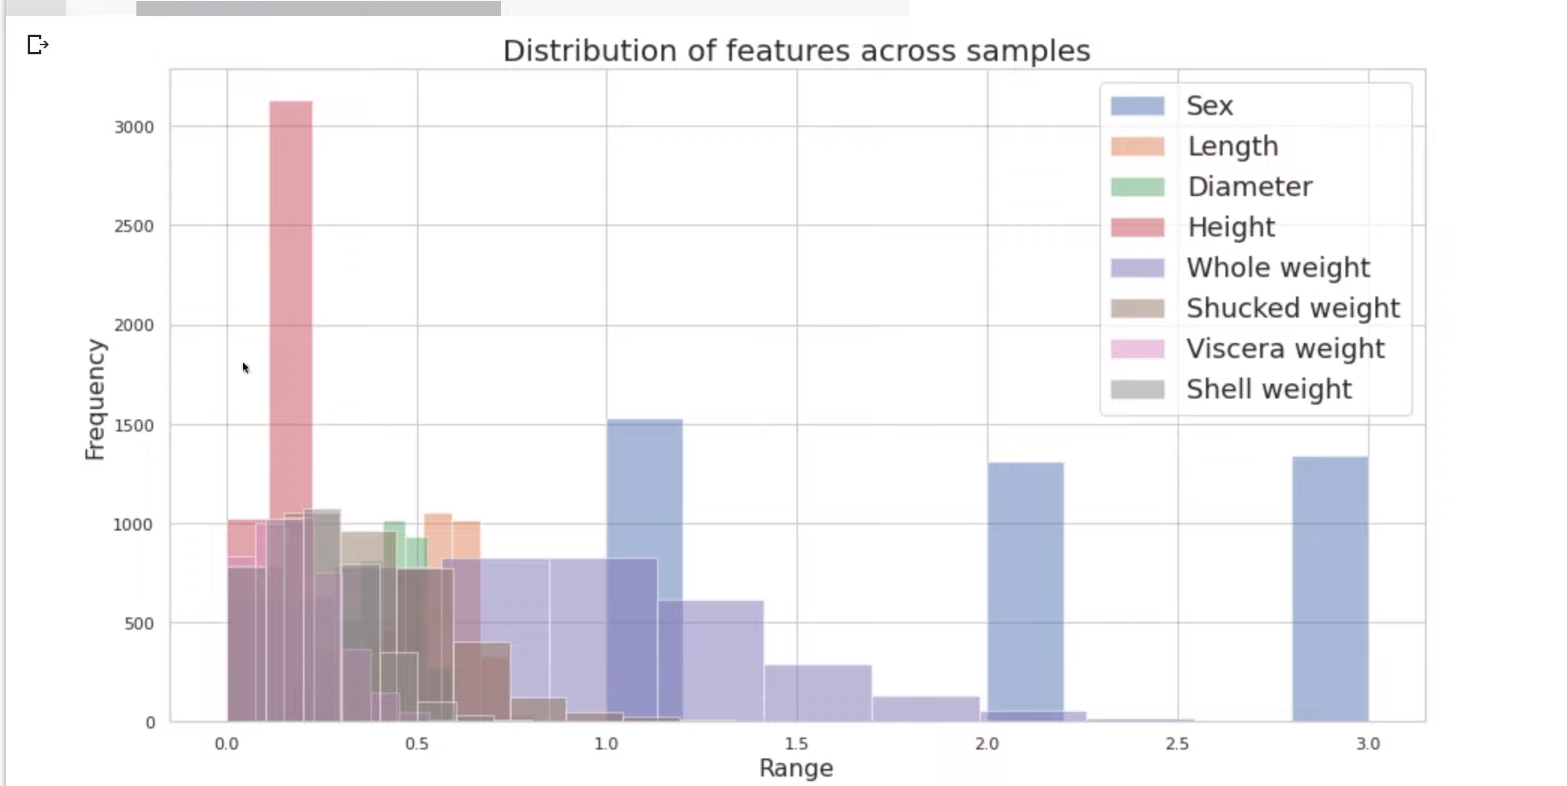

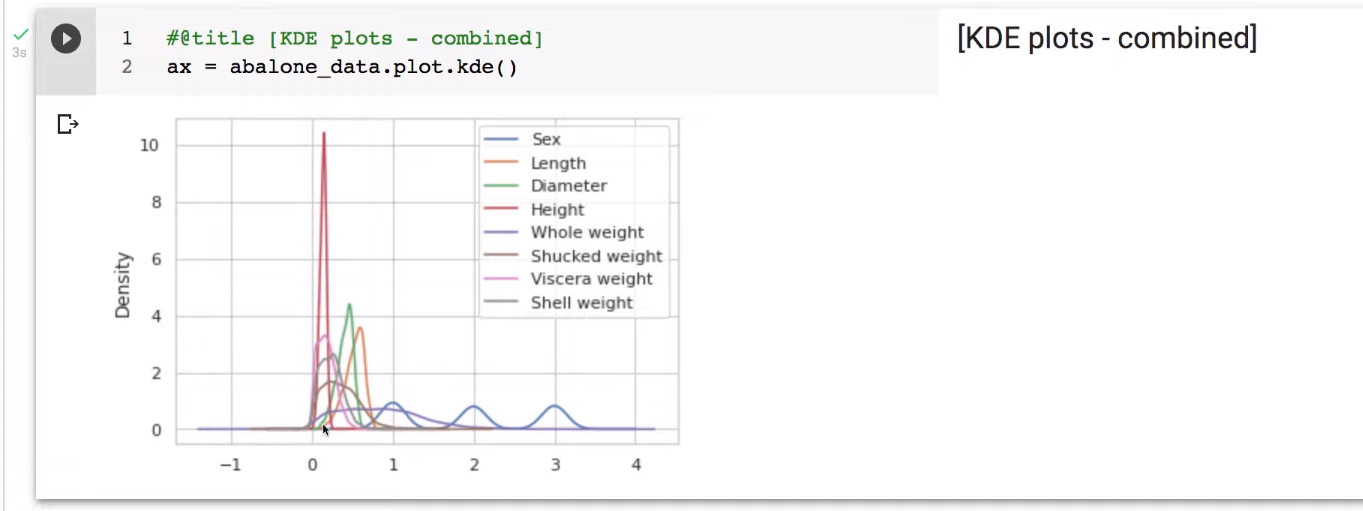

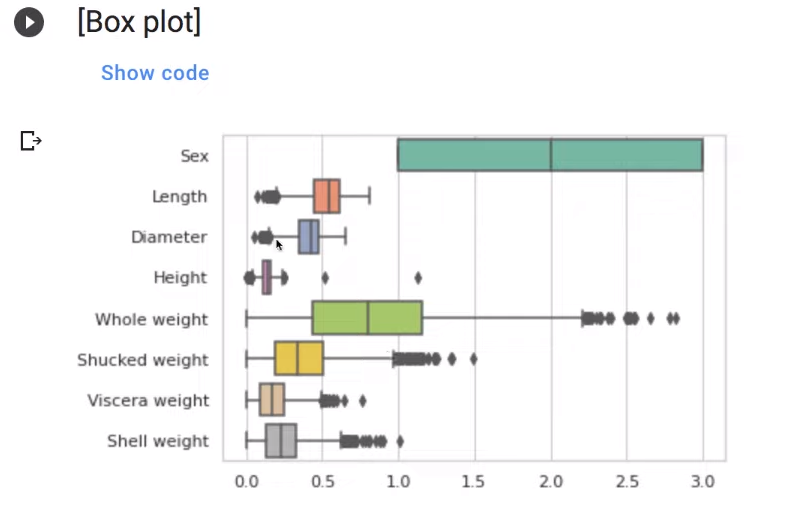

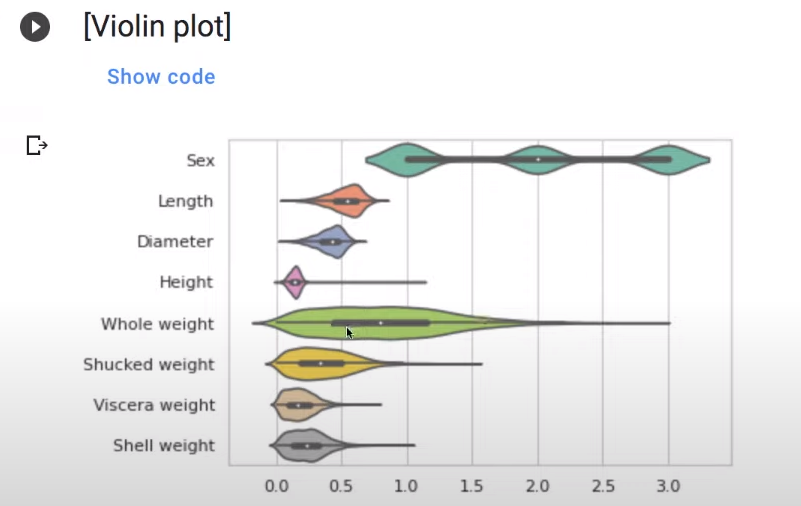

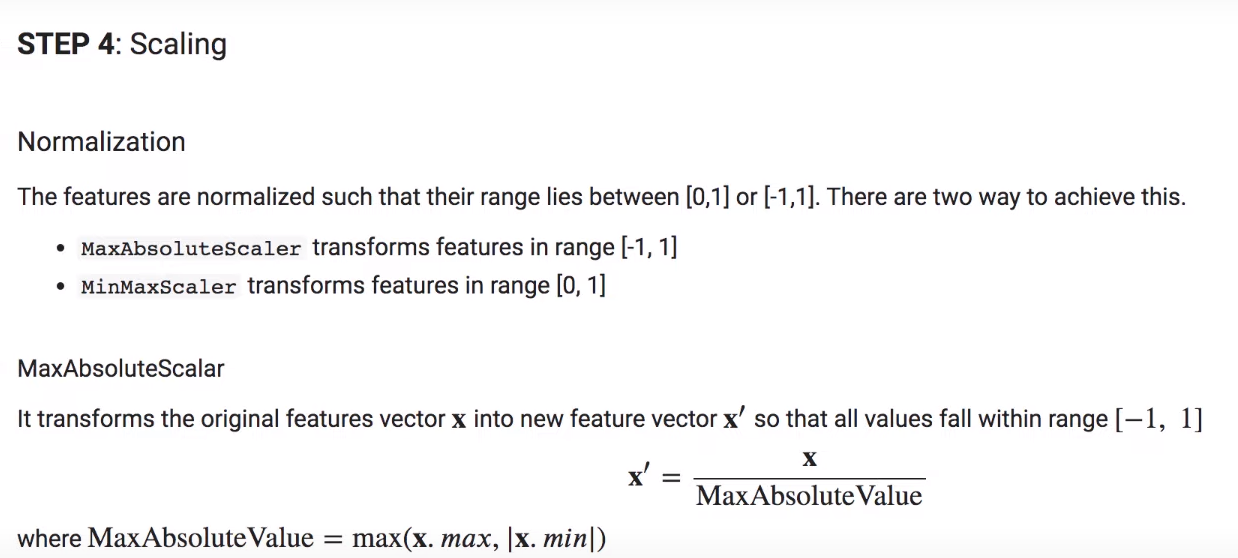

In [40]:
x = np.array([4,2,5,-2,-100]).reshape(-1,1)
x

array([[   4],
       [   2],
       [   5],
       [  -2],
       [-100]])

In [42]:
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
x_new

array([[ 0.04],
       [ 0.02],
       [ 0.05],
       [-0.02],
       [-1.  ]])

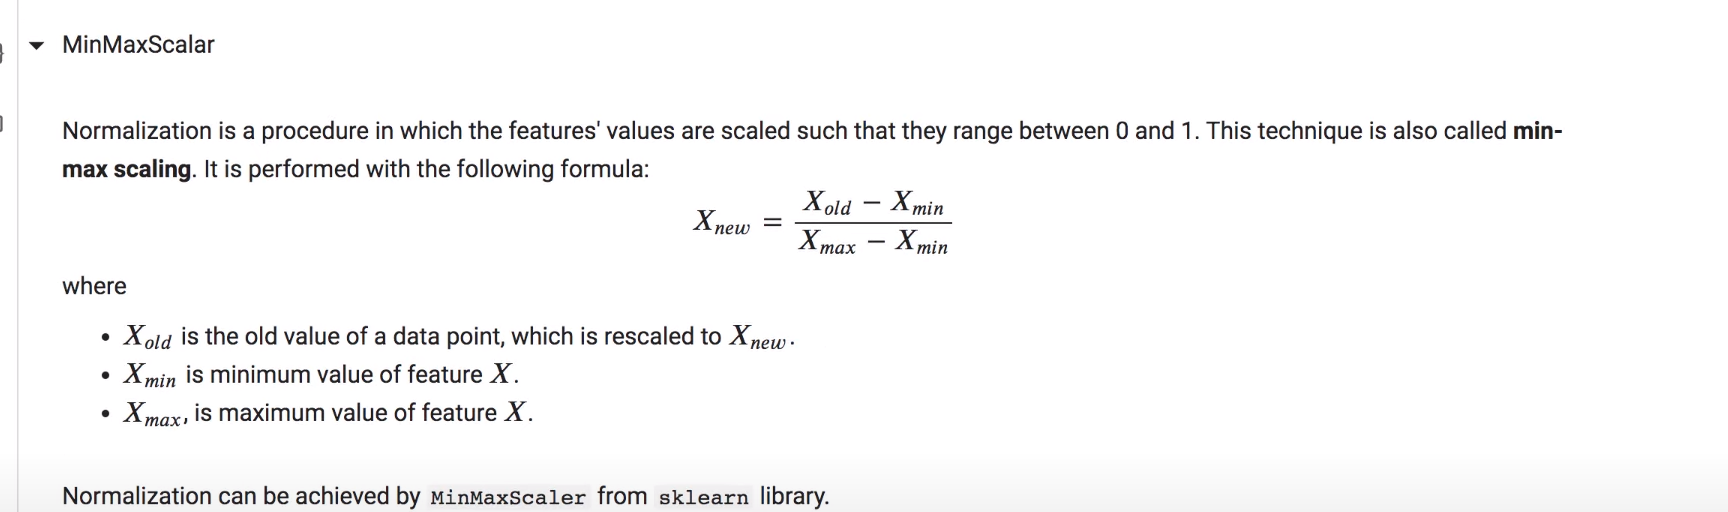

In [44]:
from sklearn.preprocessing import MinMaxScaler
x = abalone_data
mm = MinMaxScaler()
X_normalized = mm.fit_transform(x)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206, 0.5       ],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109, 0.21428571],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 , 0.28571429],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462, 0.32142857],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 , 0.21428571]])

In [45]:
X_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 , 0.31906016])

In [46]:
X_normalized.std(axis=0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055, 0.11513511])

In [47]:
data

[{'age': 4, 'height': 96.0},
 {'age': 2, 'height': 81.6},
 {'age': 3, 'height': 88.6},
 {'age': 1, 'height': 73.9}]

In [48]:
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
np.var(data_transformed,axis=0)

array([ 1.25    , 67.181875])

In [49]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [81.6],
       [88.6],
       [73.9]])

In [50]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,mutual_info_regression

X_california , y_california = fetch_california_housing(return_X_y = True)

X,y = X_california[:2000, :],y_california[:2000]


print(X.shape)


(2000, 8)


In [51]:
skb = SelectKBest(mutual_info_regression,k=3)
X_new = skb.fit_transform(X,y)
X_new.shape

(2000, 3)

In [52]:
skb.get_feature_names_out() # top 3 features

array(['x0', 'x6', 'x7'], dtype=object)

In [53]:
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression,percentile=30)
X_new = sp.fit_transform(X,y)
X_new.shape

(2000, 3)

In [54]:
skb.get_feature_names_out() # top 30 percentile features

array(['x0', 'x6', 'x7'], dtype=object)

In [55]:
from sklearn.feature_selection import GenericUnivariateSelect
gus = GenericUnivariateSelect(mutual_info_regression,mode='k_best',param = 3)
X_new = gus.fit_transform(X,y)
X_new.shape

(2000, 3)

In [56]:
#wrapper based methods
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector  = RFE(estimator,n_features_to_select=3,step=1)
selector = selector.fit(X,y)


selector.ranking_






array([1, 5, 4, 3, 6, 2, 1, 1])

In [57]:
selector.support_
# rank 1 is selected rest are not selected

array([ True, False, False, False, False, False,  True,  True])

In [58]:
X_new = selector.transform(X)
X_new.shape

(2000, 3)

In [60]:
#RFE-CV
# do the above thing with cv

In [62]:
#Select from Model
from sklearn.feature_selection import SelectFromModel
estimator = LinearRegression()
estimator.fit(X,y)

LinearRegression()

In [63]:
estimator.coef_

array([ 3.64048292e-01,  5.56221906e-03,  5.13591243e-02, -1.64474348e-01,
        5.90411479e-05, -1.64573915e-01, -2.17724525e-01, -1.85343265e-01])

In [65]:
np.argsort(estimator.coef_)[-3:] #indices of top 3 features

array([1, 2, 0])

In [66]:
t = np.argsort(np.abs(estimator.coef_))[-3:]

model = SelectFromModel(estimator,max_features=3,prefit=True)
X_new = model.transform(X)
X_new.shape

(2000, 3)

In [67]:
from sklearn.feature_selection import SequentialFeatureSelector

In [73]:
%%time
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator,n_features_to_select=3)
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 147 ms


In [74]:
%%time
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator,n_features_to_select=3,direction='backward')
sfs.fit_transform(X,y)
sfs.get_support()

CPU times: user 346 ms, sys: 213 ms, total: 559 ms
Wall time: 289 ms


array([ True, False, False, False, False,  True,  True, False])

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [76]:
pca.n_components

2

In [77]:
pca.components_

array([[ 3.58746278e-04, -5.26626273e-03, -3.55739438e-04,
        -1.04636644e-04,  9.99985993e-01,  1.07189337e-04,
        -3.72926795e-05, -3.18638902e-05],
       [ 2.83042309e-02, -9.96787172e-01,  7.04618553e-02,
         1.11176863e-02, -5.23215008e-03, -1.02817045e-03,
         1.45200590e-02,  1.69252465e-02]])

In [78]:
pca.explained_variance_

array([9.32990794e+05, 1.72499472e+02])

In [80]:
#Chaining Transformers
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
estimator = [
    ('simpleImputer',SimpleImputer()), # tuple of (identifier , transformer)
    ('standardScaler',StandardScaler()),# note the final one should be fit intermidite can be fit and tranform
]

pipe = Pipeline(steps=estimator)
#apply same  pipeline 


In [81]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SimpleImputer(),
                    StandardScaler())

In [82]:
from sklearn.decomposition import PCA
estimators = [
    ('simpleImputer',SimpleImputer()),
    ('pca',PCA()),
    ('regressor',LinearRegression())
    
    
]
pipe = Pipeline(steps = estimators)

In [85]:
# number of steps
print(pipe.steps)
print(len(pipe.steps))

[('simpleImputer', SimpleImputer()), ('pca', PCA()), ('regressor', LinearRegression())]
3


In [86]:
pipe.named_steps.pca

PCA()

In [87]:
pipe.steps[1]

('pca', PCA())

In [88]:
pipe[1]

PCA()

In [90]:
pipe['pca']

PCA()

In [92]:
#Caching Tranformer


import tempfile
tempDirPath = tempfile.TemporaryDirectory()
estimators = [
    ('simpleImputer',SimpleImputer()),
    ('pca',PCA()),
    ('regressor',LinearRegression())
    
    
]
pipe = Pipeline(steps = estimators,memory=tempDirPath)

In [93]:
#Visulaizing Pipeline
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
    ('selector', ColumnTransformer([('select_first-4', 'passthrough',slice(0,4))])),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = ColumnTransformer([
    ('label_binarizer',LabelBinarizer(),[4]),])



full_pipeline = FeatureUnion(transformer_list=[('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [95]:
from sklearn import set_config
set_config(display='diagram')

full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first-4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

#handling Imbalance data
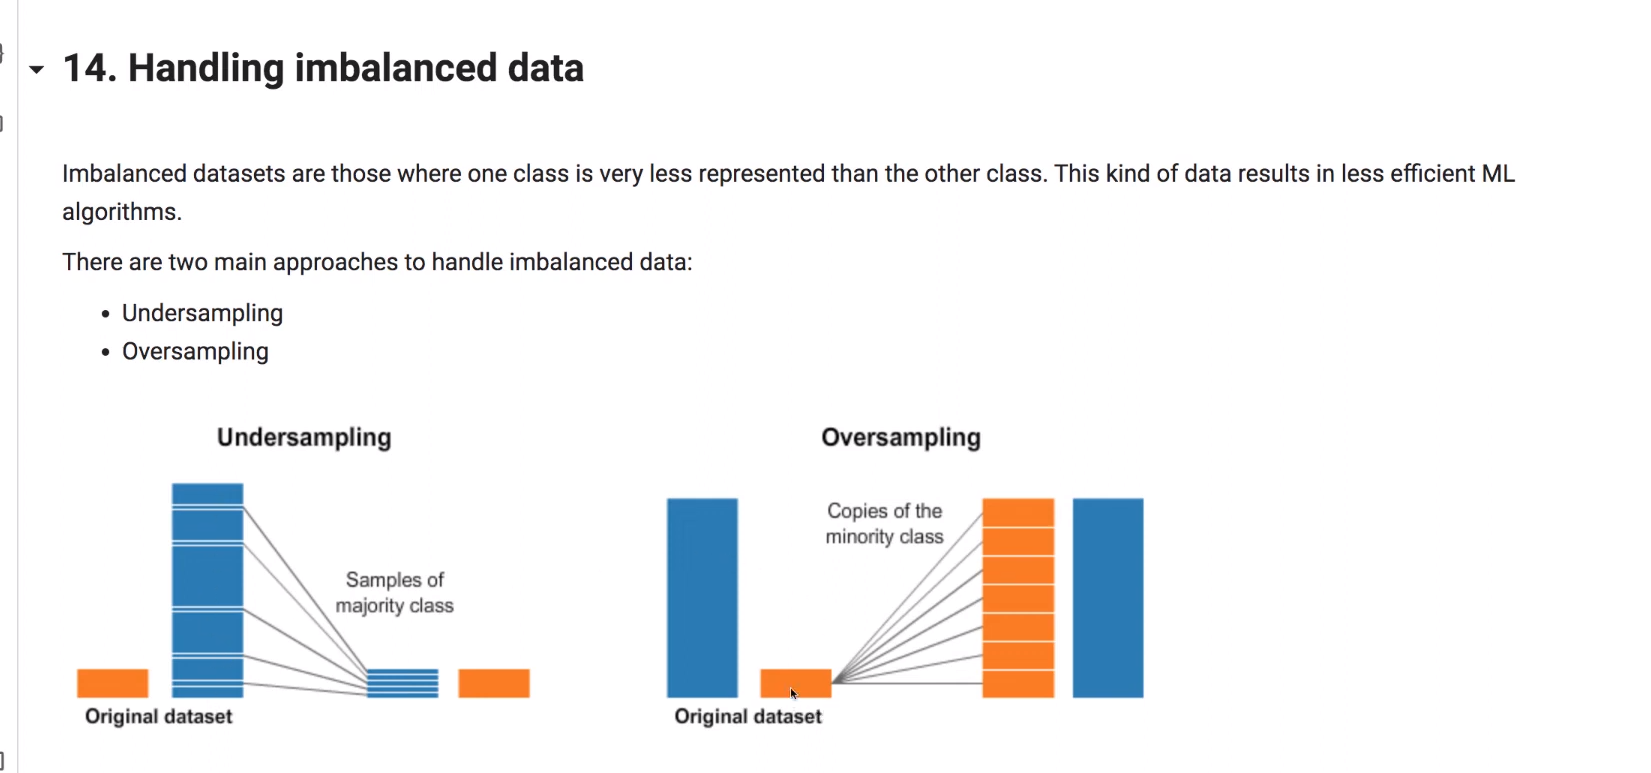

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.model_selection import train_test_split
wine_data = pd.read_csv('../wine+quality/winequality-red.csv',sep=";")

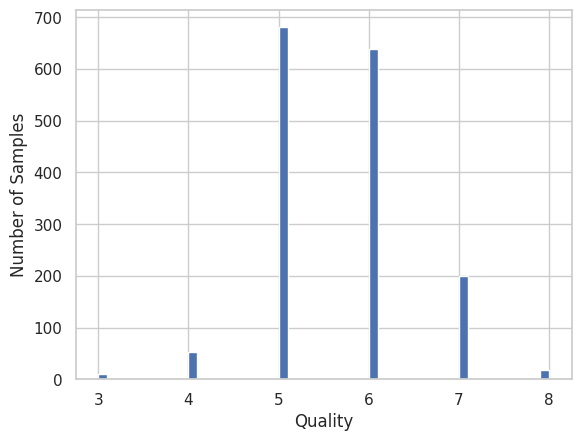

In [97]:
wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of Samples')
plt.show()

In [98]:
wine_data.shape

(1599, 12)

In [101]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

X = wine_data.drop(['quality'],axis=1)
y = wine_data['quality']
undersample = RandomUnderSampler(random_state=0)
X_rus,Y_rus = undersample.fit_resample(X,y)

In [102]:
Counter(y)

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

In [103]:
Counter(Y_rus)

Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})

In [104]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler()
X_rus,Y_rus = ros.fit_resample(X,y)

In [107]:
print(Counter(y))
print(Counter(Y_rus))

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [108]:
#SMOTE synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm,y_sm = oversample.fit_resample(X,y)
counter = Counter(y_sm)
counter

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [109]:
# total new points genrated are
print(X_sm.shape[0]-X.shape[0])

2487


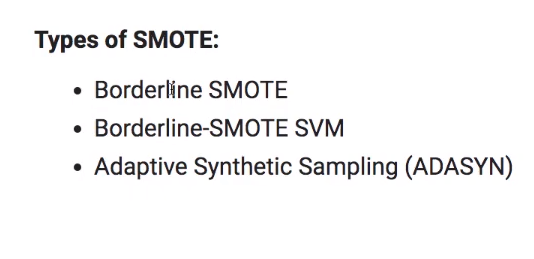